In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import preprocessing
from operator import itemgetter
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 601478 entries, 2011-06-01 00:00:00 to 2014-04-09 20:48:00
Data columns (total 19 columns):
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp    443253 non-null float64
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp    443254 non-null float64
CP_ChillerPlantSystem_Efficiency                           313413 non-null float64
CP_ChillerPlantSystem_kW                                   443255 non-null float64
CP_TotalChilledWaterPump_Efficiency                        443255 non-null float64
CP_TotalChilledWaterPump_kW                                443255 non-null float64
CP_TotalChiller_Efficiency                                 443252 non-null float64
CP_TotalChiller_kW                                         443257 non-null float64
CP_TotalCondenserWaterPump_Efficiency                      443254 non-null float64
CP_TotalCondenserWaterPump_kW                              443254 non-null float64
CP_TotalCoolingTowerSyste

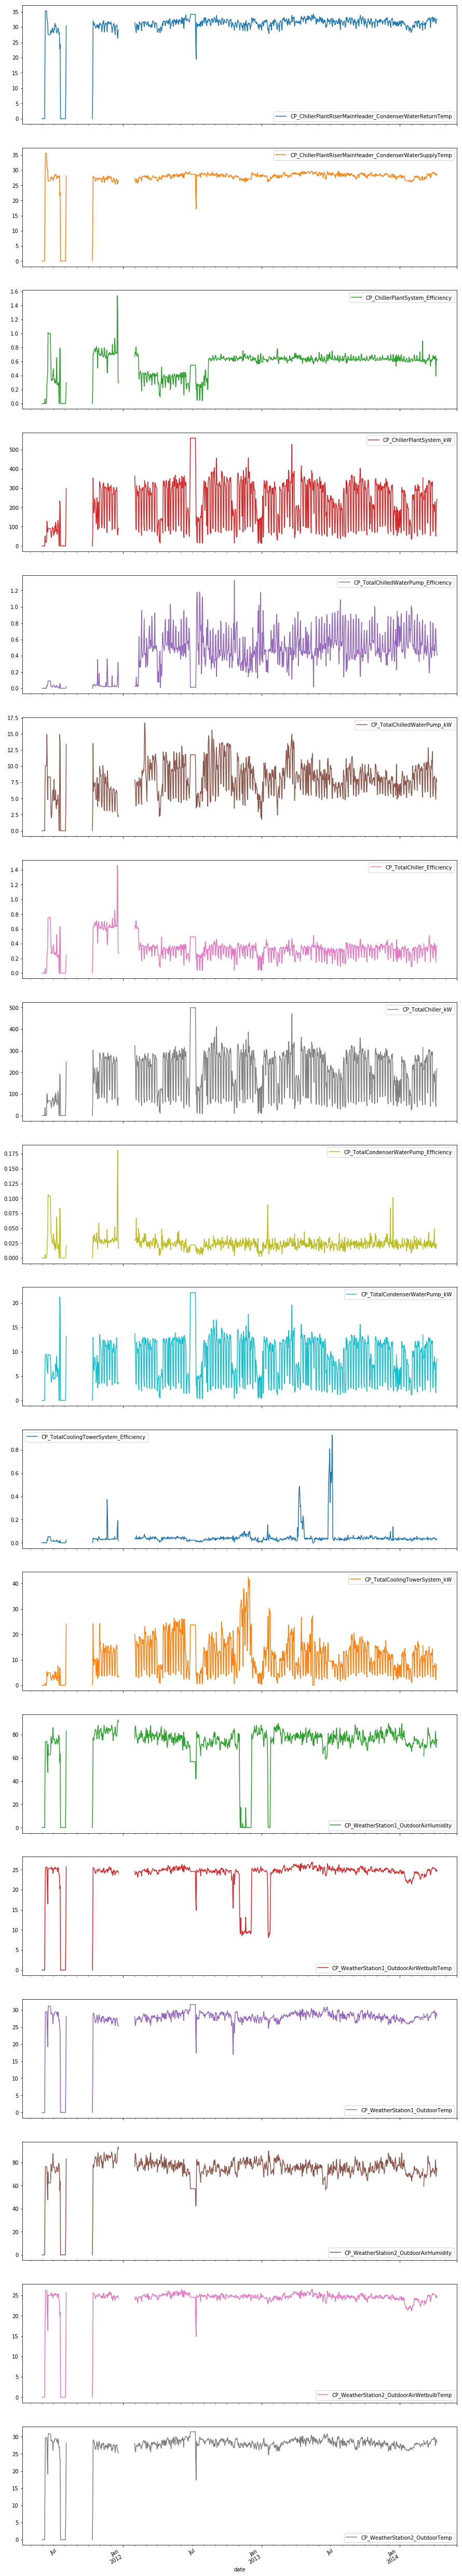

In [6]:
### read and drop the last column
cp_sys = pd.read_csv("./../FullRawChillerPlantSystem.csv", index_col="date", parse_dates=True)
print(cp_sys.info())
cp_sys.drop('Unnamed: 0', axis=1, inplace=True)
print(cp_sys.info())
cp_sys = cp_sys.resample('D').mean()
cp_sys.plot(subplots=True, figsize=(15,100))
plt.show()

In [4]:
### drop the lines that contains nan
cp_sys = cp_sys.dropna(axis=0)
print(cp_sys)

            CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp  \
date                                                                  
2011-06-01                                           0.000000         
2011-06-02                                           0.000000         
2011-06-03                                           0.000000         
2011-06-04                                           0.000000         
2011-06-05                                           0.000000         
2011-06-06                                           0.000000         
2011-06-07                                           0.000000         
2011-06-08                                           0.000000         
2011-06-09                                          21.106867         
2011-06-10                                          35.320999         
2011-06-11                                          35.320999         
2011-06-12                                          35.320999         
2011-0

In [5]:
cp_sys.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 933 entries, 2011-06-01 to 2014-04-09
Data columns (total 18 columns):
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp    933 non-null float64
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp    933 non-null float64
CP_ChillerPlantSystem_Efficiency                           933 non-null float64
CP_ChillerPlantSystem_kW                                   933 non-null float64
CP_TotalChilledWaterPump_Efficiency                        933 non-null float64
CP_TotalChilledWaterPump_kW                                933 non-null float64
CP_TotalChiller_Efficiency                                 933 non-null float64
CP_TotalChiller_kW                                         933 non-null float64
CP_TotalCondenserWaterPump_Efficiency                      933 non-null float64
CP_TotalCondenserWaterPump_kW                              933 non-null float64
CP_TotalCoolingTowerSystem_Efficiency                      933 non-null floa

In [6]:
"""
### fail to use clustering to change the value into symbol
conden_ret_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp'].values
index_date = cp_sys.index.values
ret_tmp_index = list(zip(index_date,conden_ret_tmp))
labels = KMeans(n_clusters=3).fit_predict(ret_tmp_index)
plt.scatter(index_date,conden_ret_tmp,c=labels)
plt.show()
"""

"\n### fail to use clustering to change the value into symbol\nconden_ret_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp'].values\nindex_date = cp_sys.index.values\nret_tmp_index = list(zip(index_date,conden_ret_tmp))\nlabels = KMeans(n_clusters=3).fit_predict(ret_tmp_index)\nplt.scatter(index_date,conden_ret_tmp,c=labels)\nplt.show()\n"

In [7]:
### drop the numbers that has 3 standard deviation from the mean
#CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp 
conden_ret_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp']
conden_ret_tmp_clean = conden_ret_tmp[(conden_ret_tmp<(conden_ret_tmp.mean()+3*conden_ret_tmp.std())) 
                                      & (conden_ret_tmp>(conden_ret_tmp.mean()-3*conden_ret_tmp.std()))]
#CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp 
conden_sup_tmp = cp_sys['CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp']
conden_sup_tmp_clean = conden_sup_tmp[(conden_sup_tmp<(conden_sup_tmp.mean()+3*conden_sup_tmp.std()))
                                     & (conden_sup_tmp>(conden_sup_tmp.mean()-3*conden_sup_tmp.std()))]
#CP_WeatherStation1_OutdoorAirHumidity
sta1_air_hum = cp_sys['CP_WeatherStation1_OutdoorAirHumidity']
sta1_air_hum_clean = sta1_air_hum[(sta1_air_hum<(sta1_air_hum.mean()+3*sta1_air_hum.std()))
                                 & (sta1_air_hum>(sta1_air_hum.mean()-3*sta1_air_hum.std()))]
#CP_WeatherStation1_OutdoorAirWetbulbTemp  
sta1_air_wetemp = cp_sys['CP_WeatherStation1_OutdoorAirWetbulbTemp']
sta1_air_wetemp_clean = sta1_air_wetemp[(sta1_air_wetemp<(sta1_air_wetemp.mean()+3*sta1_air_wetemp.std()))
                                       & (sta1_air_wetemp>(sta1_air_wetemp.mean()-3*sta1_air_wetemp.std()))]
#CP_WeatherStation1_OutdoorTemp
sta1_air_outmp = cp_sys['CP_WeatherStation1_OutdoorTemp']
sta1_air_outmp_clean = sta1_air_outmp[(sta1_air_outmp<(sta1_air_outmp.mean()+3*sta1_air_outmp.std()))
                                     & (sta1_air_outmp>(sta1_air_outmp.mean()-3*sta1_air_outmp.std()))]
#CP_WeatherStation2_OutdoorAirHumidity 
sta2_air_hum = cp_sys['CP_WeatherStation2_OutdoorAirHumidity']
sta2_air_hum_clean = sta2_air_hum[(sta2_air_hum<(sta2_air_hum.mean()+3*sta2_air_hum.std()))
                                 & (sta2_air_hum>(sta2_air_hum.mean()-3*sta2_air_hum.std()))]
#CP_WeatherStation2_OutdoorAirWetbulbTemp  
sta2_air_wetemp = cp_sys['CP_WeatherStation2_OutdoorAirWetbulbTemp']
sta2_air_wetemp_clean = sta2_air_wetemp[(sta2_air_wetemp<(sta2_air_wetemp.mean()+3*sta2_air_wetemp.std()))
                                       & (sta2_air_wetemp>(sta2_air_wetemp.mean()-3*sta2_air_wetemp.std()))]
#CP_WeatherStation2_OutdoorTemp
sta2_air_outmp = cp_sys['CP_WeatherStation2_OutdoorTemp']
sta2_air_outmp_clean = sta2_air_outmp[(sta2_air_outmp<(sta2_air_outmp.mean()+3*sta2_air_outmp.std()))
                                     & (sta2_air_outmp>(sta2_air_outmp.mean()-3*sta2_air_outmp.std()))]

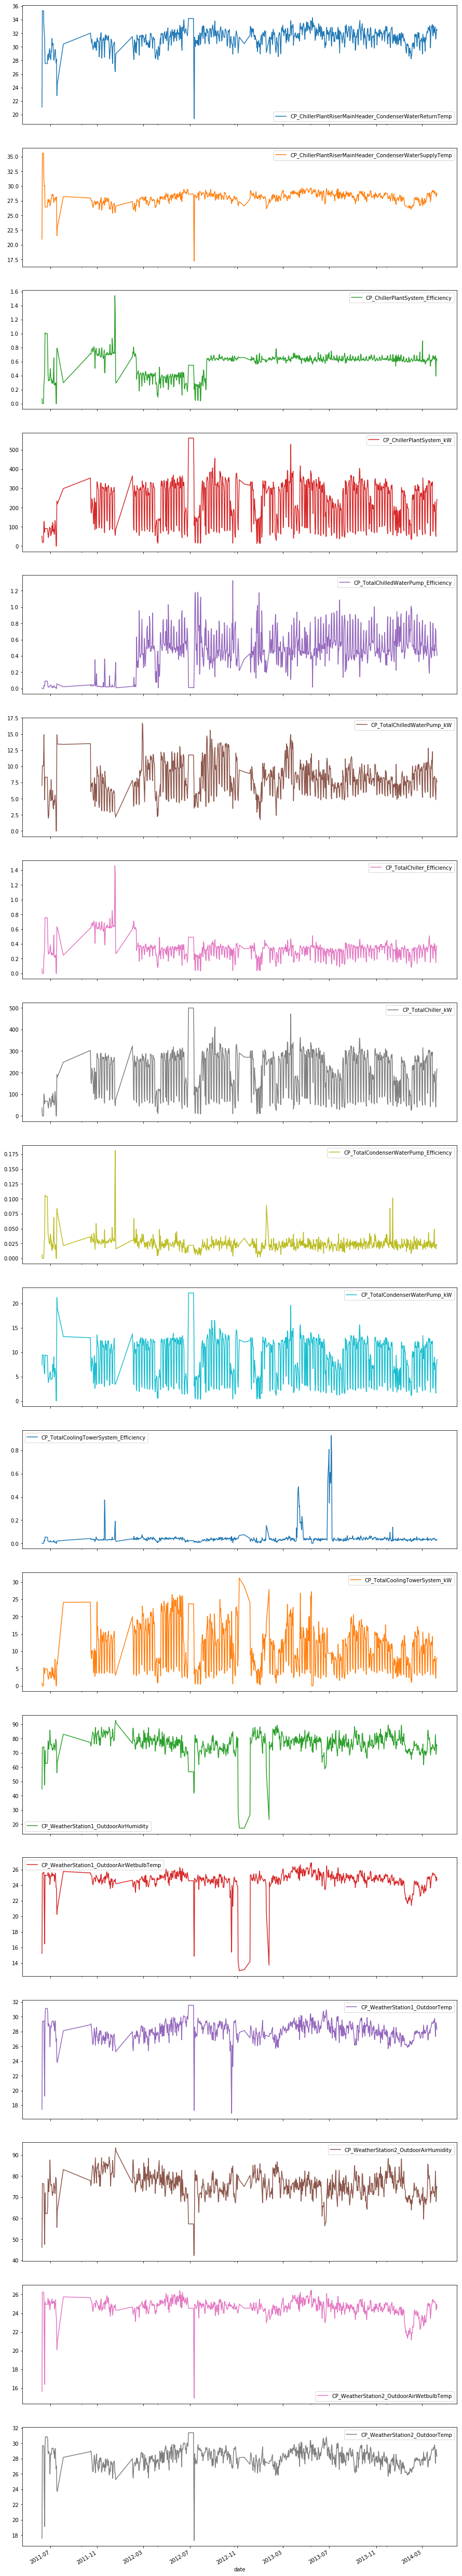

In [8]:
### create a new dataframe with the new series
CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp = pd.DataFrame(conden_ret_tmp_clean)
CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp = pd.DataFrame(conden_sup_tmp_clean)
CP_ChillerPlantSystem_Efficiency = pd.DataFrame(cp_sys['CP_ChillerPlantSystem_Efficiency'])
CP_ChillerPlantSystem_kW = pd.DataFrame(cp_sys['CP_ChillerPlantSystem_kW'])
CP_TotalChilledWaterPump_Efficiency = pd.DataFrame(cp_sys['CP_TotalChilledWaterPump_Efficiency'])
CP_TotalChilledWaterPump_kW = pd.DataFrame(cp_sys['CP_TotalChilledWaterPump_kW'])
CP_TotalChiller_Efficiency = pd.DataFrame(cp_sys['CP_TotalChiller_Efficiency'])
CP_TotalChiller_kW = pd.DataFrame(cp_sys['CP_TotalChiller_kW'])
CP_TotalCondenserWaterPump_Efficiency = pd.DataFrame(cp_sys['CP_TotalCondenserWaterPump_Efficiency'])
CP_TotalCondenserWaterPump_kW = pd.DataFrame(cp_sys['CP_TotalCondenserWaterPump_kW'])
CP_TotalCoolingTowerSystem_Efficiency = pd.DataFrame(cp_sys['CP_TotalCoolingTowerSystem_Efficiency'])
CP_TotalCoolingTowerSystem_kW = pd.DataFrame(cp_sys['CP_TotalCoolingTowerSystem_kW'])
CP_WeatherStation1_OutdoorAirHumidity = pd.DataFrame(sta1_air_hum_clean)
CP_WeatherStation1_OutdoorAirWetbulbTemp = pd.DataFrame(sta1_air_wetemp_clean)
CP_WeatherStation1_OutdoorTemp = pd.DataFrame(sta1_air_outmp_clean)
CP_WeatherStation2_OutdoorAirHumidity = pd.DataFrame(sta2_air_hum_clean)
CP_WeatherStation2_OutdoorAirWetbulbTemp = pd.DataFrame(sta2_air_wetemp_clean)
CP_WeatherStation2_OutdoorTemp = pd.DataFrame(sta2_air_outmp_clean)
cp_sys_clean = pd.concat([CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp,
                   CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp,
                   CP_ChillerPlantSystem_Efficiency,
                   CP_ChillerPlantSystem_kW,
                   CP_TotalChilledWaterPump_Efficiency,
                   CP_TotalChilledWaterPump_kW,
                   CP_TotalChiller_Efficiency,
                   CP_TotalChiller_kW,
                   CP_TotalCondenserWaterPump_Efficiency,
                   CP_TotalCondenserWaterPump_kW,
                   CP_TotalCoolingTowerSystem_Efficiency,
                   CP_TotalCoolingTowerSystem_kW,
                   CP_WeatherStation1_OutdoorAirHumidity,
                   CP_WeatherStation1_OutdoorAirWetbulbTemp,
                   CP_WeatherStation1_OutdoorTemp,
                   CP_WeatherStation2_OutdoorAirHumidity,
                   CP_WeatherStation2_OutdoorAirWetbulbTemp,
                   CP_WeatherStation2_OutdoorTemp],axis=1).dropna(axis=0)
cp_sys_clean.plot(subplots=True,figsize=(15,100))
plt.show()

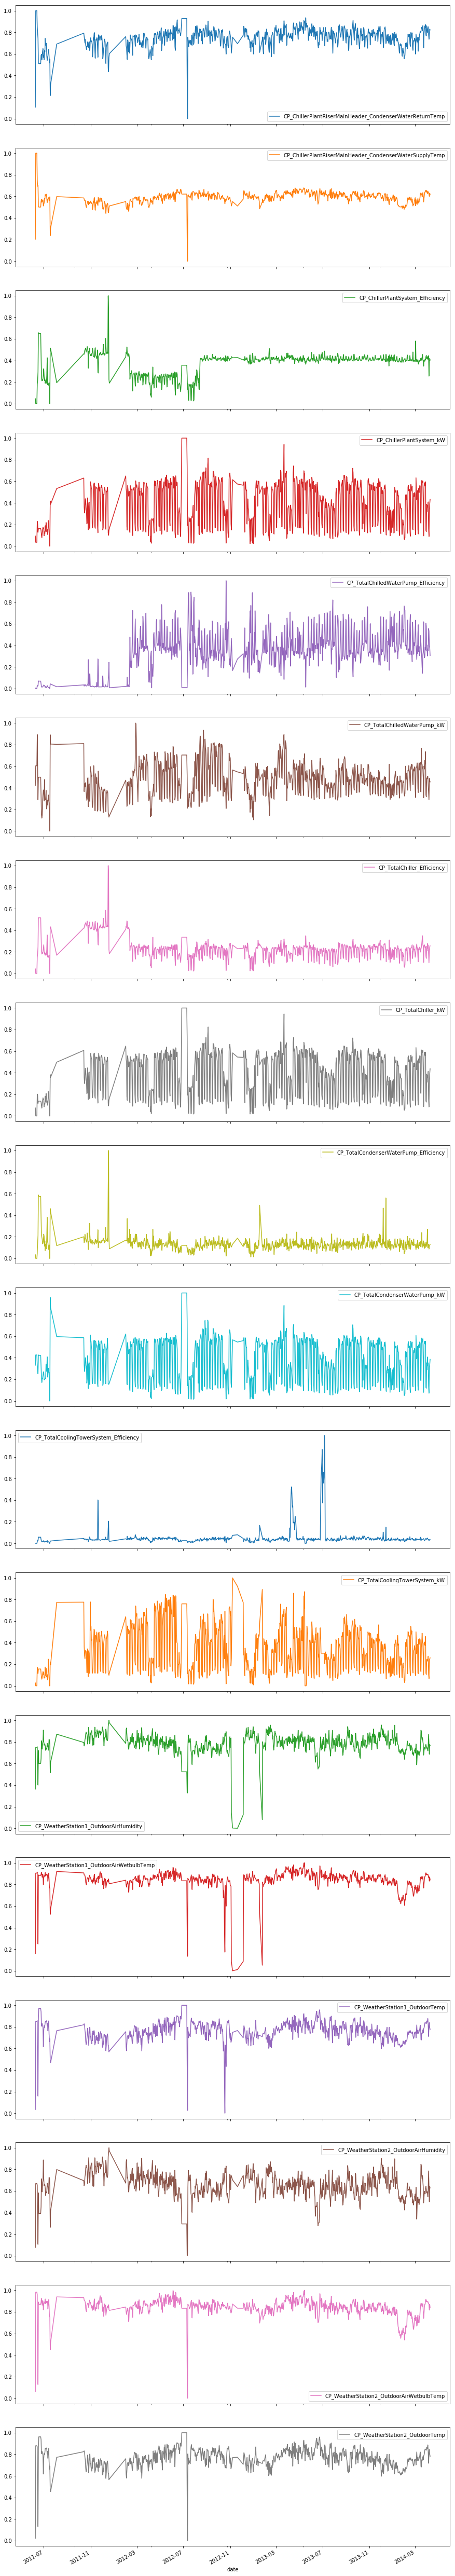

In [9]:
### scale the data into [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
s_con_ret_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantRiserMainHeader_CondenserWaterReturnTemp"],
                            index=cp_sys_clean.index)
s_con_sup_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantRiserMainHeader_CondenserWaterSupplyTemp"],
                            index=cp_sys_clean.index)
s_ch_sys_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantSystem_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantSystem_Efficiency"],
                            index=cp_sys_clean.index)
s_ch_sys_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_ChillerPlantSystem_kW"].values.reshape(-1,1)),
                            columns=["CP_ChillerPlantSystem_kW"],
                            index=cp_sys_clean.index)
s_ch_pump_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChilledWaterPump_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalChilledWaterPump_Efficiency"],
                            index=cp_sys_clean.index)
s_ch_pump_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChilledWaterPump_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalChilledWaterPump_kW"],
                            index=cp_sys_clean.index)
s_tot_chi_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChiller_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalChiller_Efficiency"],
                            index=cp_sys_clean.index)
s_tot_chi_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalChiller_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalChiller_kW"],
                            index=cp_sys_clean.index)
s_con_pump_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCondenserWaterPump_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalCondenserWaterPump_Efficiency"],
                            index=cp_sys_clean.index)
s_con_pump_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCondenserWaterPump_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalCondenserWaterPump_kW"],
                            index=cp_sys_clean.index)
s_tow_sys_eff = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCoolingTowerSystem_Efficiency"].values.reshape(-1,1)),
                            columns=["CP_TotalCoolingTowerSystem_Efficiency"],
                            index=cp_sys_clean.index)
s_tow_sys_kw = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_TotalCoolingTowerSystem_kW"].values.reshape(-1,1)),
                            columns=["CP_TotalCoolingTowerSystem_kW"],
                            index=cp_sys_clean.index)
s_stat1_air_hum = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorAirHumidity"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorAirHumidity"],
                            index=cp_sys_clean.index)
s_stat1_wet_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorAirWetbulbTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorAirWetbulbTemp"],
                            index=cp_sys_clean.index)
s_stat1_out_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation1_OutdoorTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation1_OutdoorTemp"],
                            index=cp_sys_clean.index)
s_stat2_air_hum = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorAirHumidity"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorAirHumidity"],
                            index=cp_sys_clean.index)
s_stat2_wet_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorAirWetbulbTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorAirWetbulbTemp"],
                            index=cp_sys_clean.index)
s_stat2_out_tmp = pd.DataFrame(min_max_scaler.fit_transform(cp_sys_clean["CP_WeatherStation2_OutdoorTemp"].values.reshape(-1,1)),
                            columns=["CP_WeatherStation2_OutdoorTemp"],
                            index=cp_sys_clean.index)
s_cp_sys_clean = pd.concat([s_con_ret_tmp,
                           s_con_sup_tmp,
                           s_ch_sys_eff,
                           s_ch_sys_kw,
                           s_ch_pump_eff,
                           s_ch_pump_kw,
                           s_tot_chi_eff,
                           s_tot_chi_kw,
                           s_con_pump_eff,
                           s_con_pump_kw,
                           s_tow_sys_eff,
                           s_tow_sys_kw,
                           s_stat1_air_hum,
                           s_stat1_wet_tmp,
                           s_stat1_out_tmp,
                           s_stat2_air_hum,
                           s_stat2_wet_tmp,
                           s_stat2_out_tmp],axis=1)
s_cp_sys_clean.plot(subplots=True,figsize=(15,100))
plt.show()

In [10]:
def SAX(dataframe,dframe,low_mid,mid_high):
    for i in range(874):
        ind = str(dataframe.index[i]).split(' ')[0]
        if(float(dataframe.loc[ind]) < low_mid):
            dataframe.loc[ind] = dframe + "_low"
        elif(low_mid <= float(dataframe.loc[ind]) <= mid_high):
            dataframe.loc[ind] = dframe + "_mid"
        elif(float(dataframe.loc[ind]) > mid_high):
            dataframe.loc[ind] = dframe + "_high"
SAX(s_con_ret_tmp,"con_ret_tmp",0.4,0.7)
SAX(s_con_sup_tmp,"con_sup_tmp",0.4,0.6)
SAX(s_ch_sys_eff,"ch_sys_eff",0.3,0.4)
SAX(s_ch_sys_kw,"ch_sys_kw",0.2,0.4)
SAX(s_ch_pump_eff,"ch_pump_eff",0.2,0.38)
SAX(s_ch_pump_kw,"ch_pump_kw",0.3,0.6)
SAX(s_tot_chi_eff,"tot_chi_eff",0.15,0.25)
SAX(s_tot_chi_kw,"tot_chi_kw",0.2,0.4)
SAX(s_con_pump_eff,"con_pump_eff",0.1,0.17)
SAX(s_con_pump_kw,"con_pump_kw",0.2,0.4)
SAX(s_tow_sys_eff,"tow_sys_eff",0.03,0.05)
SAX(s_tow_sys_kw,"tow_sys_kw",0.2,0.4)
SAX(s_stat1_air_hum,"stat1_air_hum",0.6,0.8)
SAX(s_stat1_wet_tmp,"stat1_wet_tmp",0.6,0.8)
SAX(s_stat1_out_tmp,"stat1_out_tmp",0.6,0.8)
SAX(s_stat2_air_hum,"stat2_air_hum",0.6,0.8)
SAX(s_stat2_wet_tmp,"stat2_wet_tmp",0.8,0.85)
SAX(s_stat2_out_tmp,"stat2_out_tmp",0.7,0.8)
SAX_cp_sys = pd.concat([s_con_ret_tmp,
                        s_con_sup_tmp,
                        s_ch_sys_eff,
                        s_ch_sys_kw,
                        s_ch_pump_eff,
                        s_ch_pump_kw,
                        s_tot_chi_eff,
                        s_tot_chi_kw,
                        s_con_pump_eff,
                        s_con_pump_kw,
                        s_tow_sys_eff,
                        s_tow_sys_kw,
                        s_stat1_air_hum,
                        s_stat1_out_tmp,
                        s_stat2_air_hum,
                        s_stat2_wet_tmp,
                        s_stat2_out_tmp],axis=1) 
SAX_cp_sys.to_csv('chiller_system.basket', index=False, header=False, sep= ',')

In [11]:
import Orange
data = Orange.data.Table('chiller_system.basket')
rules = Orange.associate.AssociationRulesSparseInducer(data, support=0.3)
print "%4s %4s  %s" % ("Supp", "Conf", "Rule")
for r in rules:
    print "%4.1f %4.1f %4.1f  %s" % (r.support, r.confidence, r.lift, r)

Supp Conf  Rule
 0.4  0.8  ch_pump_eff_mid -> tot_chi_kw_high
 0.4  0.7  tot_chi_kw_high -> ch_pump_eff_mid
 0.4  0.8  ch_pump_eff_mid -> tot_chi_kw_high ch_sys_kw_high
 0.4  1.0  ch_pump_eff_mid tot_chi_kw_high -> ch_sys_kw_high
 0.4  1.0  ch_pump_eff_mid ch_sys_kw_high -> tot_chi_kw_high
 0.4  0.7  tot_chi_kw_high -> ch_pump_eff_mid ch_sys_kw_high
 0.4  0.7  tot_chi_kw_high ch_sys_kw_high -> ch_pump_eff_mid
 0.4  0.7  ch_sys_kw_high -> ch_pump_eff_mid tot_chi_kw_high
 0.3  0.8  ch_pump_eff_mid -> tot_chi_kw_high ch_sys_kw_high con_pump_kw_high
 0.3  1.0  ch_pump_eff_mid tot_chi_kw_high -> ch_sys_kw_high con_pump_kw_high
 0.3  1.0  ch_pump_eff_mid tot_chi_kw_high ch_sys_kw_high -> con_pump_kw_high
 0.3  1.0  ch_pump_eff_mid tot_chi_kw_high con_pump_kw_high -> ch_sys_kw_high
 0.3  1.0  ch_pump_eff_mid ch_sys_kw_high -> tot_chi_kw_high con_pump_kw_high
 0.3  1.0  ch_pump_eff_mid ch_sys_kw_high con_pump_kw_high -> tot_chi_kw_high
 0.3  1.0  ch_pump_eff_mid con_pump_kw_high -> tot_chi_kw_

 0.4  0.5  con_ret_tmp_high -> stat1_air_hum_mid
 0.3  0.6  stat1_air_hum_mid -> ch_pump_kw_mid
 0.3  0.5  ch_pump_kw_mid -> stat1_air_hum_mid
 0.5  0.9  con_pump_kw_high -> con_ret_tmp_high
 0.5  0.6  con_ret_tmp_high -> con_pump_kw_high
 0.3  0.6  con_pump_kw_high -> ch_pump_kw_mid
 0.3  0.5  ch_pump_kw_mid -> con_pump_kw_high
 0.4  1.0  con_sup_tmp_high -> con_ret_tmp_high
 0.4  0.6  con_ret_tmp_high -> con_sup_tmp_high
 0.5  0.7  con_ret_tmp_high -> ch_pump_kw_mid
 0.5  0.8  ch_pump_kw_mid -> con_ret_tmp_high


In [12]:
result_rules = [(r.support, r.confidence, str(r).split('->')) for r in rules]
result_rules = sorted(result_rules, key=itemgetter(2))
print(result_rules)
print(len(result_rules))

[(0.3501144051551819, 0.8476454019546509, ['ch_pump_eff_mid ', ' ch_sys_kw_high']), (0.34210526943206787, 0.8282548189163208, ['ch_pump_eff_mid ', ' ch_sys_kw_high con_pump_kw_high']), (0.3386727571487427, 0.8199446201324463, ['ch_pump_eff_mid ', ' ch_sys_kw_high con_pump_kw_high con_ret_tmp_high']), (0.3466819226741791, 0.8393352031707764, ['ch_pump_eff_mid ', ' ch_sys_kw_high con_ret_tmp_high']), (0.34324944019317627, 0.8310249447822571, ['ch_pump_eff_mid ', ' con_pump_kw_high']), (0.3398169279098511, 0.8227146863937378, ['ch_pump_eff_mid ', ' con_pump_kw_high con_ret_tmp_high']), (0.3855835199356079, 0.9335179924964905, ['ch_pump_eff_mid ', ' con_ret_tmp_high']), (0.3501144051551819, 0.8476454019546509, ['ch_pump_eff_mid ', ' tot_chi_kw_high']), (0.3501144051551819, 0.8476454019546509, ['ch_pump_eff_mid ', ' tot_chi_kw_high ch_sys_kw_high']), (0.34210526943206787, 0.8282548189163208, ['ch_pump_eff_mid ', ' tot_chi_kw_high ch_sys_kw_high con_pump_kw_high']), (0.3386727571487427, 0.81

In [13]:
### get all the one-one rules
one_one_rules = []
for i in range(len(result_rules)):
    if(len(result_rules[i][2][0].split(' '))==2 and len(result_rules[i][2][1].split(' '))==2):
        one_one_rules.append(result_rules[i])
print(one_one_rules)

[(0.3501144051551819, 0.8476454019546509, ['ch_pump_eff_mid ', ' ch_sys_kw_high']), (0.34324944019317627, 0.8310249447822571, ['ch_pump_eff_mid ', ' con_pump_kw_high']), (0.3855835199356079, 0.9335179924964905, ['ch_pump_eff_mid ', ' con_ret_tmp_high']), (0.3501144051551819, 0.8476454019546509, ['ch_pump_eff_mid ', ' tot_chi_kw_high']), (0.44393593072891235, 0.6666666865348816, ['ch_pump_kw_mid ', ' ch_sys_eff_high']), (0.32151028513908386, 0.4828178584575653, ['ch_pump_kw_mid ', ' ch_sys_kw_high']), (0.44622424244880676, 0.6701030731201172, ['ch_pump_kw_mid ', ' con_pump_eff_mid']), (0.31121280789375305, 0.4673539400100708, ['ch_pump_kw_mid ', ' con_pump_kw_high']), (0.5263158082962036, 0.7903780341148376, ['ch_pump_kw_mid ', ' con_ret_tmp_high']), (0.3764302134513855, 0.5652921199798584, ['ch_pump_kw_mid ', ' con_sup_tmp_mid']), (0.32723110914230347, 0.49140894412994385, ['ch_pump_kw_mid ', ' stat1_air_hum_high']), (0.32265445590019226, 0.4845360815525055, ['ch_pump_kw_mid ', ' stat1

In [14]:
### manipulate the one_one_rules to datafram
one_one_from = []
one_one_to = []
one_one_value = []
for i in range(len(one_one_rules)):
    one_one_from.append(one_one_rules[i][2][0])
    one_one_to.append(one_one_rules[i][2][1])
    one_one_value.append(one_one_rules[i][1])
one_one_df = pd.DataFrame({'one_one_from':one_one_from,
                           'one_one_to':one_one_to,
                           'one_one_value':one_one_value})
one_one_df.head()

one_one_from         one_one_to  one_one_value
0  ch_pump_eff_mid      ch_sys_kw_high       0.847645
1  ch_pump_eff_mid    con_pump_kw_high       0.831025
2  ch_pump_eff_mid    con_ret_tmp_high       0.933518
3  ch_pump_eff_mid     tot_chi_kw_high       0.847645
4   ch_pump_kw_mid     ch_sys_eff_high       0.666667

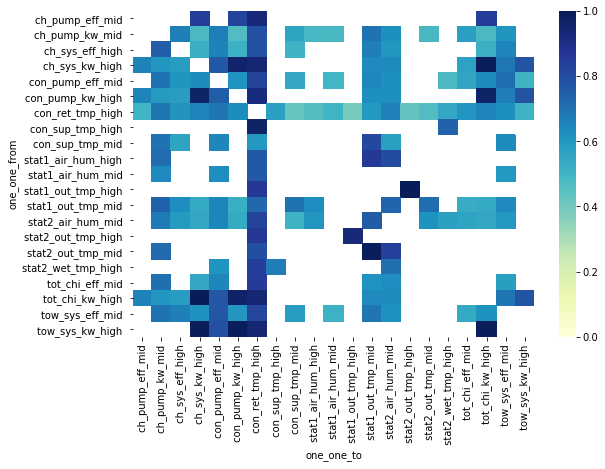

In [18]:
pt = one_one_df.pivot_table(index='one_one_from', columns='one_one_to', values='one_one_value', aggfunc=np.sum)
pt.head()
f, ax = plt.subplots(figsize=(9, 6))
one_one_rules = sns.heatmap(pt, fmt="d",cmap='YlGnBu', ax=ax,vmin=0,vmax=1)
one_one_rules.get_figure().savefig("one_one_rules.png",bbox_inches="tight")

In [16]:
### manipulate the whole rules set
rules_from = []
rules_to = []
rules_value = []
for i in range(len(result_rules)):
    rules_from.append(result_rules[i][2][0])
    rules_to.append(result_rules[i][2][1])
    rules_value.append(result_rules[i][1])
whole_rules_df = pd.DataFrame({'whole_rules_from':rules_from,
                              'whole_rules_to':rules_to,
                              'whole_rules_value':rules_value})
whole_rules_df.head()

whole_rules_from                                     whole_rules_to  \
0  ch_pump_eff_mid                                      ch_sys_kw_high   
1  ch_pump_eff_mid                     ch_sys_kw_high con_pump_kw_high   
2  ch_pump_eff_mid    ch_sys_kw_high con_pump_kw_high con_ret_tmp_high   
3  ch_pump_eff_mid                     ch_sys_kw_high con_ret_tmp_high   
4  ch_pump_eff_mid                                    con_pump_kw_high   

   whole_rules_value  
0           0.847645  
1           0.828255  
2           0.819945  
3           0.839335  
4           0.831025

In [34]:
whole_pt = whole_rules_df.pivot_table(index='whole_rules_from', columns='whole_rules_to', values='whole_rules_value', aggfunc=np.sum)
f, ax = plt.subplots(figsize=(150,150))
sns.set(font_scale=3)
one_heat = sns.heatmap(whole_pt,fmt="d",cmap='YlGnBu',linewidths=.5, ax=ax,vmin=0,vmax=1)
one_heat.get_figure().savefig('whole_rules.png',bbox_inches="tight")